# **Machine Learning Regresion**

## Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Load Data

In [4]:
df = pd.read_csv('data/house_pricing_feature.csv', sep=',')
pd.options.display.max_columns = None   #para que muestren todas las columnas
df.head()

,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,EnclosedPorch,PoolArea,SalePrice,C (all),FV,RH,RL,RM,Grvl,Pave,AllPub,NoSeWa,Gtl,Mod,Sev,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Flat,Gable,Gambrel,Hip,Mansard,Shed,BrkTil,CBlock,PConc,Slab,Stone,Wood,Floor,GasA,GasW,Grav,OthW,Wall,N,Y,FuseA,FuseF,FuseP,Mix,SBrkr,Sbrkr,0,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,0.1,Fin,RFn,Unf,N.1,P,Y.1,0.2,Gar2,Othr,Shed.1,TenC
0,8450,2003,2003,856,856,854,1710,1,2,3,1,8,0,2003.0,2,548,61,0,0,208500,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,9600,1976,1976,1262,1262,0,1262,0,2,3,1,6,1,1976.0,2,460,0,0,0,181500,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
2,11250,2001,2002,920,920,866,1786,1,2,3,1,6,1,2001.0,2,608,42,0,0,223500,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
3,9550,1915,1970,756,961,756,1717,1,1,3,1,7,1,1998.0,3,642,35,272,0,140000,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
4,14260,2000,2000,1145,1145,1053,2198,1,2,4,1,9,1,2000.0,3,836,84,0,0,250000,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0


## Train / Test

In [8]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cross-validation

In [5]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, median_absolute_error

In [6]:
# Declare KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf2 = KFold(n_splits=10, shuffle=True, random_state=42)

In [18]:
# Declare scores to be used
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
    'MedAE': make_scorer(median_absolute_error)
}

## Baseline

In [8]:
from sklearn.dummy import DummyRegressor

In [10]:
print("----------------------------- (k = 5)")

bl = DummyRegressor(strategy='mean')
cv_results = cross_validate(bl, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10)")

cv_results = cross_validate(bl, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

----------------------------- (k = 5)
Train MSE: 5964081937.8
Validation MSE: 5967175123.2

Train MAE: 56304.3
Validation MAE: 56318.2
----------------------------- (k = 10)
Train MSE: 5964292552.4
Validation MSE: 5968037858.5

Train MAE: 56306.5
Validation MAE: 56309.7


## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [12]:
print("----------------------------- (k = 5)")

lr = LinearRegression()
cv_results = cross_validate(lr, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))



print("----------------------------- (k = 10)")

cv_results = cross_validate(lr, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))


----------------------------- (k = 5)
Train MSE: 1278797351.7
Validation MSE: 1646445148.1

Train MAE: 22469.2
Validation MAE: 24522.3
----------------------------- (k = 10)
Train MSE: 1294222860.1
Validation MSE: 1665450163.5

Train MAE: 22505.2
Validation MAE: 24619.7


In [13]:
# Podemos ver que en k = 5 nos da valores mas bajos, y compradado con el baseline hemos mejorado bastante.

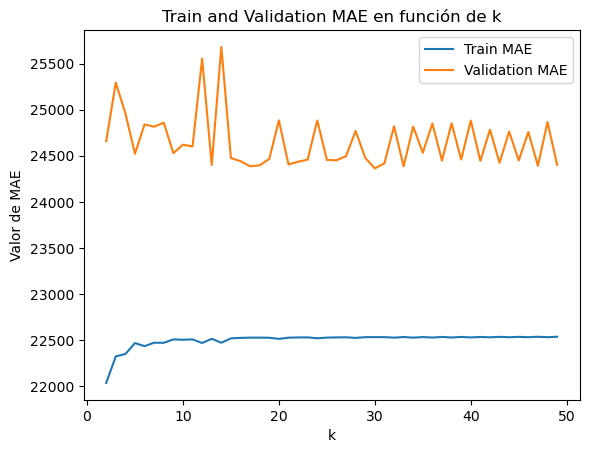

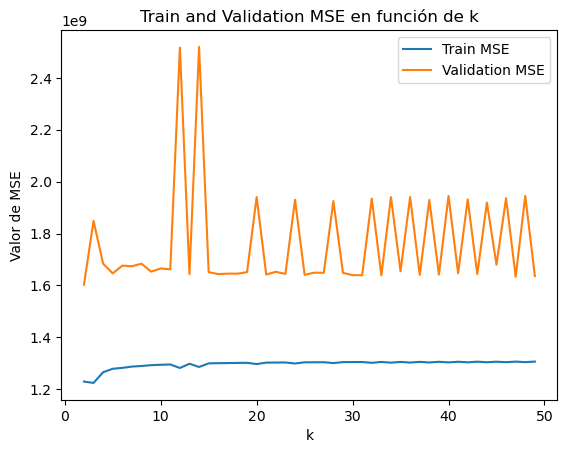

In [14]:
list_train_MSE = []
list_vali_MSE = []
list_train_MAE = []
list_vali_MAE = []

k_values = list(range(2, 50))

for i in k_values:
    kf = KFold(n_splits=i, shuffle=True, random_state=42)
    lr = LinearRegression()
    cv_results = cross_validate(lr, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_train_MSE.append(cv_results['train_MSE'].mean().round(1))
    list_vali_MSE.append(cv_results['test_MSE'].mean().round(1))
    list_train_MAE.append(cv_results['train_MAE'].mean().round(1))
    list_vali_MAE.append(cv_results['test_MAE'].mean().round(1))


plt.plot(k_values, list_train_MAE, label='Train MAE')
plt.plot(k_values, list_vali_MAE, label='Validation MAE')
plt.xlabel('k')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de k')
plt.legend()
plt.show()

plt.plot(k_values, list_train_MSE, label='Train MSE')
plt.plot(k_values, list_vali_MSE, label='Validation MSE')
plt.xlabel('k')
plt.ylabel('Valor de MSE')
plt.title('Train and Validation MSE en función de k')
plt.legend()
plt.show()



   


In [15]:
# Observamos que en valor 5 ya se empieza a estabilizar, aunque hay dos picos, y con esta distribucion random parece que los pares e impares va dando picos

## k-Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsRegressor

### Euclidiana

In [31]:
# kNN model with 5 neighbors and Euclidean distance
#StandardScaler

knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=2, n_jobs=-1))
])

knn2 = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3, p=2, n_jobs=-1))
])



print("----------------------------- (k = 5) euclidiana (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) euclidiana (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 5) euclidiana (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) euclidiana (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))



----------------------------- (k = 5) euclidiana (n = 5)
Train MSE: 1140584489.7
Validation MSE: 1613370831.6

Train MAE: 20781.6
Validation MAE: 25363.9
----------------------------- (k = 10) euclidiana (n = 5)
Train MSE: 1153292311.8
Validation MSE: 1585414627.9

Train MAE: 20905.4
Validation MAE: 25459.7
----------------------------- (k = 5) euclidiana (n = 3)
Train MSE: 926671975.3
Validation MSE: 1750058934.4

Train MAE: 18471.7
Validation MAE: 26428.1
----------------------------- (k = 10) euclidiana (n = 3)
Train MSE: 960284968.8
Validation MSE: 1687994830.9

Train MAE: 18669.2
Validation MAE: 26203.6


In [18]:
# En estas pruebas la euclidiana va mejor en k=10 y n = 5

In [19]:
#MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

knn = Pipeline([
    ('scale', MinMaxScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=2, n_jobs=-1))
])

knn2 = Pipeline([
    ('scale', MinMaxScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3, p=2, n_jobs=-1))
])



print("----------------------------- (k = 5) euclidiana (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) euclidiana (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 5) euclidiana (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) euclidiana (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

----------------------------- (k = 5) euclidiana (n = 5)
Train MSE: 1220336235.4
Validation MSE: 1879622744.8

Train MAE: 22152.4
Validation MAE: 27728.3
----------------------------- (k = 10) euclidiana (n = 5)
Train MSE: 1244704728.7
Validation MSE: 1887311113.4

Train MAE: 22337.7
Validation MAE: 27990.2
----------------------------- (k = 5) euclidiana (n = 3)
Train MSE: 870300716.3
Validation MSE: 1839196709.0

Train MAE: 18856.4
Validation MAE: 27741.3
----------------------------- (k = 10) euclidiana (n = 3)
Train MSE: 891046235.1
Validation MSE: 1827832911.5

Train MAE: 19109.6
Validation MAE: 27769.3


In [20]:
#RobustScaler

from sklearn.preprocessing import RobustScaler


knn = Pipeline([
    ('scale', RobustScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=2, n_jobs=-1))
])

knn2 = Pipeline([
    ('scale', RobustScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3, p=2, n_jobs=-1))
])



print("----------------------------- (k = 5) euclidiana (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) euclidiana (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 5) euclidiana (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) euclidiana (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

----------------------------- (k = 5) euclidiana (n = 5)
Train MSE: 1070888126.4
Validation MSE: 1557595245.6

Train MAE: 19895.1
Validation MAE: 24108.3
----------------------------- (k = 10) euclidiana (n = 5)
Train MSE: 1089499178.5
Validation MSE: 1553787496.9

Train MAE: 20044.9
Validation MAE: 24241.1
----------------------------- (k = 5) euclidiana (n = 3)
Train MSE: 917979217.4
Validation MSE: 1707175068.4

Train MAE: 17710.4
Validation MAE: 25037.7
----------------------------- (k = 10) euclidiana (n = 3)
Train MSE: 922423556.2
Validation MSE: 1648637857.5

Train MAE: 17864.8
Validation MAE: 25230.1


In [21]:
#MaxAbsScaler

from sklearn.preprocessing import MaxAbsScaler, QuantileTransformer

knn = Pipeline([
    ('scale', MaxAbsScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=2, n_jobs=-1))
])

knn2 = Pipeline([
    ('scale', MaxAbsScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3, p=2, n_jobs=-1))
])



print("----------------------------- (k = 5) euclidiana (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) euclidiana (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 5) euclidiana (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) euclidiana (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

----------------------------- (k = 5) euclidiana (n = 5)
Train MSE: 1227624571.4
Validation MSE: 1895995082.4

Train MAE: 22418.0
Validation MAE: 28024.5
----------------------------- (k = 10) euclidiana (n = 5)
Train MSE: 1256481365.5
Validation MSE: 1908394050.7

Train MAE: 22615.5
Validation MAE: 28282.0
----------------------------- (k = 5) euclidiana (n = 3)
Train MSE: 878108783.7
Validation MSE: 1844507573.2

Train MAE: 19125.4
Validation MAE: 28187.2
----------------------------- (k = 10) euclidiana (n = 3)
Train MSE: 901529682.5
Validation MSE: 1845554531.0

Train MAE: 19312.9
Validation MAE: 28323.3


In [23]:
#QuantileTransformer

knn = Pipeline([
    ('scale', QuantileTransformer()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=2, n_jobs=-1))
])

knn2 = Pipeline([
    ('scale', QuantileTransformer()),
    ('knn', KNeighborsRegressor(n_neighbors=3, p=2, n_jobs=-1))
])



print("----------------------------- (k = 5) euclidiana (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) euclidiana (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 5) euclidiana (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) euclidiana (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

----------------------------- (k = 5) euclidiana (n = 5)
Train MSE: 1096455298.1
Validation MSE: 1620102531.0

Train MAE: 20566.7
Validation MAE: 25492.4
----------------------------- (k = 10) euclidiana (n = 5)
Train MSE: 1119385999.8
Validation MSE: 1669697858.5

Train MAE: 20848.5
Validation MAE: 25924.7
----------------------------- (k = 5) euclidiana (n = 3)
Train MSE: 842394776.9
Validation MSE: 1633344129.0

Train MAE: 18023.7
Validation MAE: 25471.2
----------------------------- (k = 10) euclidiana (n = 3)
Train MSE: 852621336.8
Validation MSE: 1675560569.5

Train MAE: 18178.5
Validation MAE: 25801.9


In [ ]:
# En la euclidiana la que mejor resultado es en la escala RobustScaler

### Manhattan

In [22]:
#StandardScaler

knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=1, n_jobs=-1))
])

knn2 = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3, p=1, n_jobs=-1))
])

print("----------------------------- (k = 5) manhattan (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) manhattan (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 5) manhattan (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) manhattan (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

----------------------------- (k = 5) manhattan (n = 5)
Train MSE: 886314056.4
Validation MSE: 1380528452.8

Train MAE: 18667.4
Validation MAE: 23081.9
----------------------------- (k = 10) manhattan (n = 5)
Train MSE: 906397282.4
Validation MSE: 1371761955.3

Train MAE: 18829.7
Validation MAE: 23095.9
----------------------------- (k = 5) manhattan (n = 3)
Train MSE: 677318356.0
Validation MSE: 1386059611.7

Train MAE: 16592.8
Validation MAE: 23914.0
----------------------------- (k = 10) manhattan (n = 3)
Train MSE: 687699266.0
Validation MSE: 1390596257.0

Train MAE: 16663.3
Validation MAE: 23858.6


In [26]:
#MinMaxScaler

knn = Pipeline([
    ('scale', MinMaxScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=1, n_jobs=-1))
])

knn2 = Pipeline([
    ('scale', MinMaxScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3, p=1, n_jobs=-1))
])

print("----------------------------- (k = 5) manhattan (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) manhattan (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 5) manhattan (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) manhattan (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

----------------------------- (k = 5) manhattan (n = 5)
Train MSE: 1047614445.1
Validation MSE: 1637260842.4

Train MAE: 20606.1
Validation MAE: 25698.7
----------------------------- (k = 10) manhattan (n = 5)
Train MSE: 1070261284.2
Validation MSE: 1611257676.6

Train MAE: 20812.7
Validation MAE: 25725.0
----------------------------- (k = 5) manhattan (n = 3)
Train MSE: 807929682.7
Validation MSE: 1541894523.1

Train MAE: 17993.7
Validation MAE: 25734.7
----------------------------- (k = 10) manhattan (n = 3)
Train MSE: 812146025.2
Validation MSE: 1543024314.7

Train MAE: 18064.2
Validation MAE: 25716.3


In [27]:
#RobustScaler

knn = Pipeline([
    ('scale', RobustScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=1, n_jobs=-1))
])

knn2 = Pipeline([
    ('scale', RobustScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3, p=1, n_jobs=-1))
])

print("----------------------------- (k = 5) manhattan (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) manhattan (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 5) manhattan (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) manhattan (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

----------------------------- (k = 5) manhattan (n = 5)
Train MSE: 948246832.9
Validation MSE: 1317282403.9

Train MAE: 18632.1
Validation MAE: 22710.0
----------------------------- (k = 10) manhattan (n = 5)
Train MSE: 958937468.4
Validation MSE: 1284324045.2

Train MAE: 18755.2
Validation MAE: 22625.2
----------------------------- (k = 5) manhattan (n = 3)
Train MSE: 855939471.6
Validation MSE: 1428619391.2

Train MAE: 16810.5
Validation MAE: 23278.9
----------------------------- (k = 10) manhattan (n = 3)
Train MSE: 855553743.6
Validation MSE: 1328212097.9

Train MAE: 16945.3
Validation MAE: 22999.1


In [28]:
#MaxAbsScaler

knn = Pipeline([
    ('scale', MaxAbsScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=1, n_jobs=-1))
])

knn2 = Pipeline([
    ('scale', MaxAbsScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3, p=1, n_jobs=-1))
])

print("----------------------------- (k = 5) manhattan (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) manhattan (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 5) manhattan (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) manhattan (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

----------------------------- (k = 5) manhattan (n = 5)
Train MSE: 1099184713.0
Validation MSE: 1737074173.5

Train MAE: 21151.5
Validation MAE: 26614.6
----------------------------- (k = 10) manhattan (n = 5)
Train MSE: 1134280493.8
Validation MSE: 1737671308.8

Train MAE: 21386.8
Validation MAE: 26758.7
----------------------------- (k = 5) manhattan (n = 3)
Train MSE: 792050341.2
Validation MSE: 1662218883.3

Train MAE: 18137.7
Validation MAE: 26555.6
----------------------------- (k = 10) manhattan (n = 3)
Train MSE: 814032642.9
Validation MSE: 1683766965.8

Train MAE: 18301.5
Validation MAE: 26698.5


In [29]:
#QuantileTransoformer

knn = Pipeline([
    ('scale', QuantileTransformer()),    
    ('knn', KNeighborsRegressor(n_neighbors=5, p=1, n_jobs=-1))
])

knn2 = Pipeline([
    ('scale', QuantileTransformer()),
    ('knn', KNeighborsRegressor(n_neighbors=3, p=1, n_jobs=-1))
])

print("----------------------------- (k = 5) manhattan (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) manhattan (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 5) manhattan (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) manhattan (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

----------------------------- (k = 5) manhattan (n = 5)
Train MSE: 952370411.4
Validation MSE: 1431129805.3

Train MAE: 19072.8
Validation MAE: 23545.0
----------------------------- (k = 10) manhattan (n = 5)
Train MSE: 977291510.1
Validation MSE: 1495967256.1

Train MAE: 19235.0
Validation MAE: 23984.6
----------------------------- (k = 5) manhattan (n = 3)
Train MSE: 717590593.2
Validation MSE: 1415151669.1

Train MAE: 16757.1
Validation MAE: 24010.0
----------------------------- (k = 10) manhattan (n = 3)
Train MSE: 737860918.6
Validation MSE: 1490283329.0

Train MAE: 16935.6
Validation MAE: 24418.9


In [ ]:
# En este caso con manhattan tambien observamos que los mejores casos son con k = 10 y n = 5, e incluso va mejor que la euclidiana, ya que los valores son mas bajos.

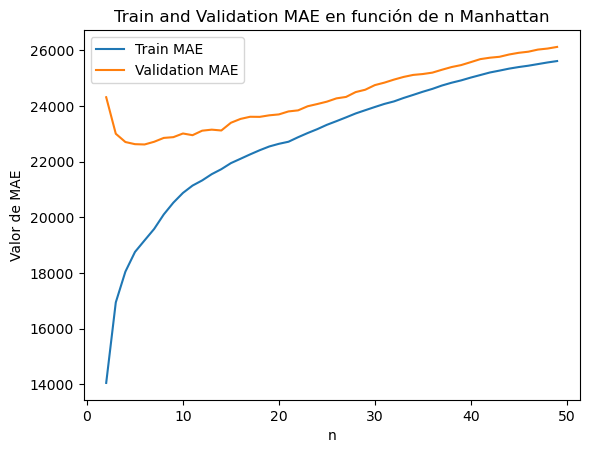

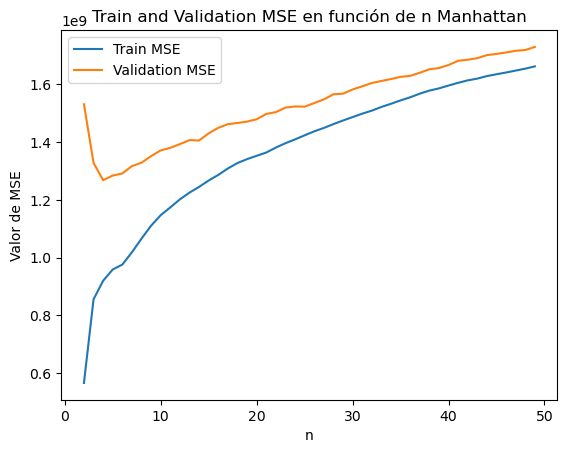

In [32]:
n_values = list(range(2, 50))

list_train_MSE = []
list_vali_MSE = []
list_train_MAE = []
list_vali_MAE = []

for i in n_values:
    knn = Pipeline([
    ('scale', RobustScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=i, p=1, n_jobs=-1))
    ])

    cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)


    list_train_MSE.append(cv_results['train_MSE'].mean().round(1))
    list_vali_MSE.append(cv_results['test_MSE'].mean().round(1))
    list_train_MAE.append(cv_results['train_MAE'].mean().round(1))
    list_vali_MAE.append(cv_results['test_MAE'].mean().round(1))

plt.plot(n_values, list_train_MAE, label='Train MAE')
plt.plot(n_values, list_vali_MAE, label='Validation MAE')
plt.xlabel('n')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de n Manhattan')
plt.legend()
plt.show()

plt.plot(n_values, list_train_MSE, label='Train MSE')
plt.plot(n_values, list_vali_MSE, label='Validation MSE')
plt.xlabel('n')
plt.ylabel('Valor de MSE')
plt.title('Train and Validation MSE en función de n Manhattan')
plt.legend()
plt.show()


In [ ]:
# Desde manhattan que, por las primeras pruebas vemos que va mejor a nuestro machine learning, podemos ver que en n = 5 
# es cuando nuestro validation tiene el valor mas pequeño, todo en  k = 10

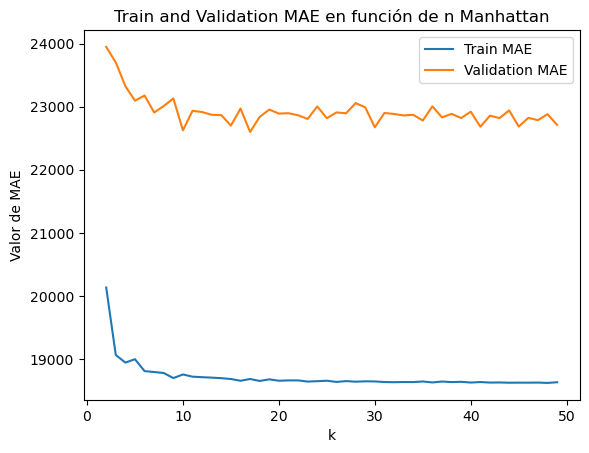

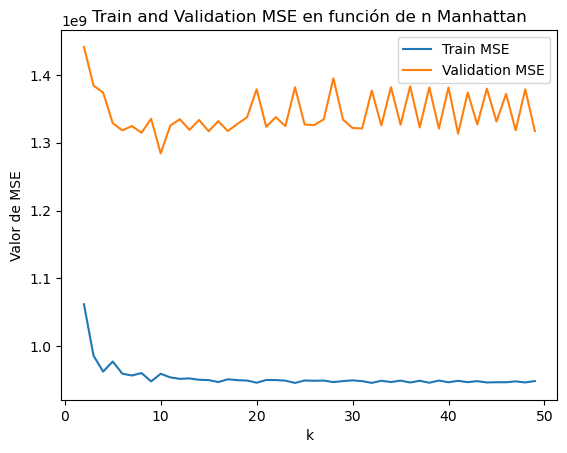

In [33]:
k_values = list(range(2, 50))

list_train_MSE = []
list_vali_MSE = []
list_train_MAE = []
list_vali_MAE = []

knn = Pipeline([
    ('scale', RobustScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=1, n_jobs=-1))
    ])

for i in k_values:
    kf = KFold(n_splits=i, shuffle=True, random_state=42)
    cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)


    list_train_MSE.append(cv_results['train_MSE'].mean().round(1))
    list_vali_MSE.append(cv_results['test_MSE'].mean().round(1))
    list_train_MAE.append(cv_results['train_MAE'].mean().round(1))
    list_vali_MAE.append(cv_results['test_MAE'].mean().round(1))

plt.plot(k_values, list_train_MAE, label='Train MAE')
plt.plot(k_values, list_vali_MAE, label='Validation MAE')
plt.xlabel('k')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de n Manhattan')
plt.legend()
plt.show()

plt.plot(k_values, list_train_MSE, label='Train MSE')
plt.plot(k_values, list_vali_MSE, label='Validation MSE')
plt.xlabel('k')
plt.ylabel('Valor de MSE')
plt.title('Train and Validation MSE en función de n Manhattan')
plt.legend()
plt.show()


In [ ]:
# Observamos que con una n = 5, a partir de k = 10 tambien es cuando se empieza a estabilizar la grafica, aunque como veiamos en el 
# linear regression, si es par o impar la ka va dando picos

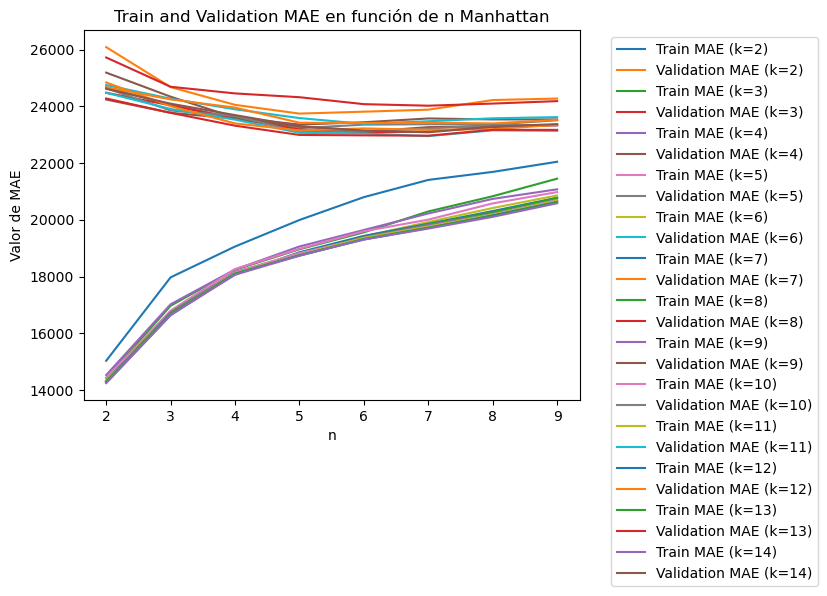

"\n    plt.plot(n_values, list_train_MSE, label='Train MSE')\n    plt.plot(n_values, list_vali_MSE, label='Validation MSE')\n    plt.xlabel('n')\n    plt.ylabel('Valor de MSE')\n    plt.title(f'Train and Validation MSE en función de n Manhattan cuando k = {i}')\n    plt.legend()\n    plt.show()"

In [75]:
k_values = list(range(2, 15))
n_values = list(range(2, 10))

list_train_MAE_all = []
list_vali_MAE_all = []

for i in k_values:

    list_train_MSE = []
    list_vali_MSE = []
    list_train_MAE = []
    list_vali_MAE = []
    
    for j in n_values:

        knn = Pipeline([
            ('scale', StandardScaler()),
            ('knn', KNeighborsRegressor(n_neighbors=j, p=1, n_jobs=-1))
        ])

        kf = KFold(n_splits=i, shuffle=True, random_state=42)
        cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

        list_train_MSE.append(cv_results['train_MSE'].mean().round(1))
        list_vali_MSE.append(cv_results['test_MSE'].mean().round(1))
        list_train_MAE.append(cv_results['train_MAE'].mean().round(1))
        list_vali_MAE.append(cv_results['test_MAE'].mean().round(1))
    
    list_train_MAE_all.append(list_train_MAE)
    list_vali_MAE_all.append(list_vali_MAE)

plt.figure()

for i, k_value in enumerate(k_values):
    plt.plot(n_values, list_train_MAE_all[i], label=f'Train MAE (k={k_value})')
    plt.plot(n_values, list_vali_MAE_all[i], label=f'Validation MAE (k={k_value})')

plt.xlabel('n')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de n Manhattan')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

        

## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [80]:

dt = DecisionTreeRegressor(max_depth=3)
cv_results = cross_validate(dt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))



Train MSE: 1926870974.7
Validation MSE: 2808946955.1

Train MAE: 31466.5
Validation MAE: 35594.6


In [81]:
dt = DecisionTreeRegressor(max_depth=None)
cv_results = cross_validate(dt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))


Train MSE: 59011.7
Validation MSE: 2049046804.1

Train MAE: 16.9
Validation MAE: 28561.4


In [82]:
list_dt_MAE_train = []
list_dt_MAE_vali = []

depth_values = list(range(2, 50))

for i in depth_values:
    dt = DecisionTreeRegressor(max_depth=i)
    cv_results = cross_validate(dt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
   

    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

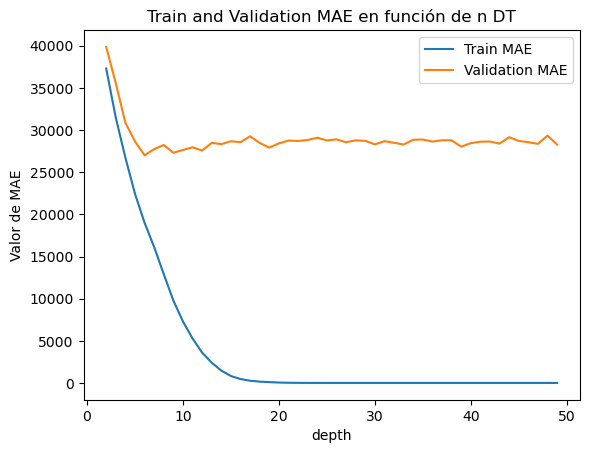

In [83]:
plt.plot(depth_values, list_dt_MAE_train, label='Train MAE')
plt.plot(depth_values, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('depth')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de n DT')
plt.legend()
plt.show()

In [84]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. depth: {depth_values[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. depth: 6
Train MAE: 19008.5
Validation MAE: 27012.1


In [ ]:
#Podemos ver que el train va hacia 0 contra mas profundo sea el arbon, pero la validation se estabiliza ya a partir del 6 y ya no cambia demasiado

In [89]:
list_dt_MAE_train = []
list_dt_MAE_vali = []

min_split_values = list(range(2, 100))

for i in min_split_values:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_split=i)
    cv_results = cross_validate(dt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

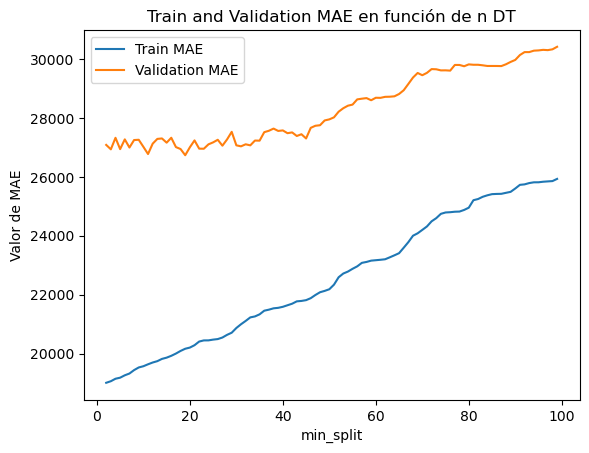

In [90]:
plt.plot(min_split_values, list_dt_MAE_train, label='Train MAE')
plt.plot(min_split_values, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('min_split')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de n DT')
plt.legend()
plt.show()

In [92]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {min_split_values[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: 19
Train MAE: 20163.0
Validation MAE: 26727.0


In [93]:
list_dt_MAE_train = []
list_dt_MAE_vali = []

min_leafs_values = list(range(2, 100))

for i in min_leafs_values:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_split=19, min_samples_leaf= i)
    cv_results = cross_validate(dt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

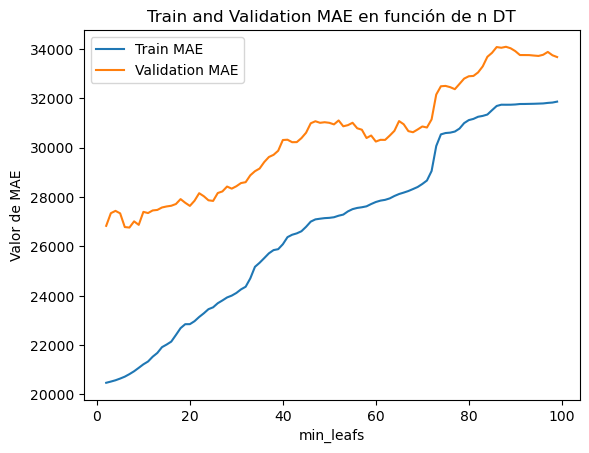

In [94]:
plt.plot(min_leafs_values, list_dt_MAE_train, label='Train MAE')
plt.plot(min_leafs_values, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('min_split')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de n DT')
plt.legend()
plt.show()

In [95]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {min_leafs_values[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: 7
Train MAE: 20821.2
Validation MAE: 26759.1


In [112]:
#criterion 

list_dt_MAE_train = []
list_dt_MAE_vali = []

criterion_values = ["poisson", "friedman_mse", "squared_error", "absolute_error"]

for i in criterion_values:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_split=19, min_samples_leaf= 7, criterion=i)
    cv_results = cross_validate(dt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

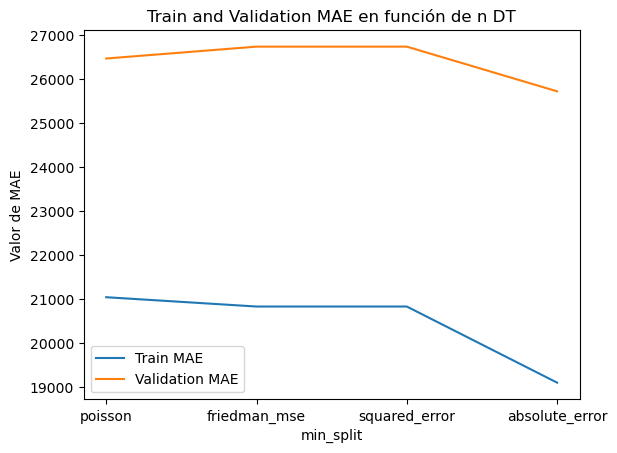

In [113]:
plt.plot(criterion_values, list_dt_MAE_train, label='Train MAE')
plt.plot(criterion_values, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('min_split')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de n DT')
plt.legend()
plt.show()

In [115]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {criterion_values[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: absolute_error
Train MAE: 19090.7
Validation MAE: 25714.0


In [ ]:
#criterion absolute_error es el que mejor valor da

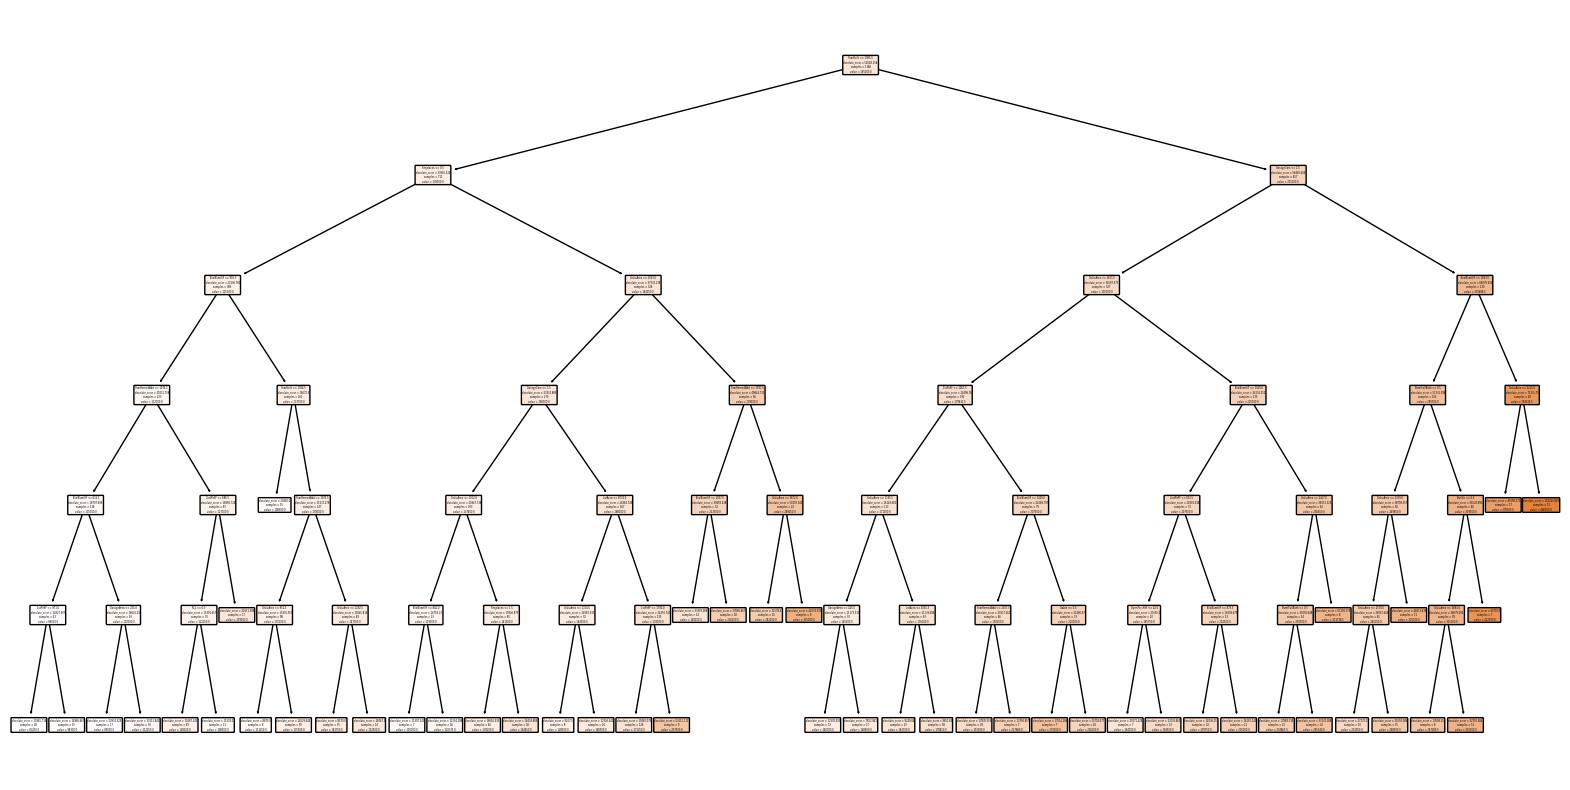

In [116]:
dt.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=list(X.columns), rounded=True)
plt.show()

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
estimators = list(range(2, 1002, 50))

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in estimators:
    rf = RandomForestRegressor(i, max_depth=10, n_jobs= -1)
    cv_results = cross_validate(rf, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

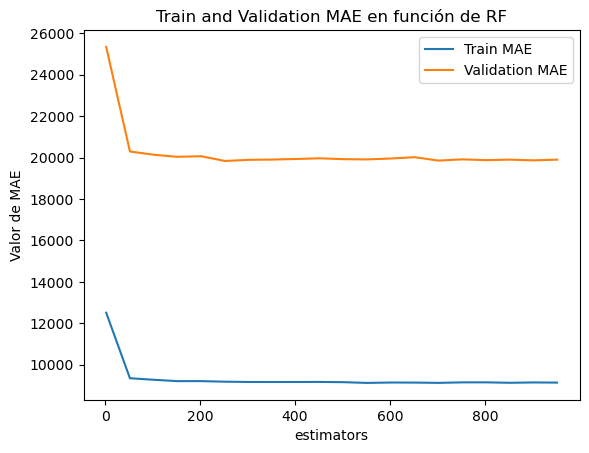

In [14]:
plt.plot(estimators, list_dt_MAE_train, label='Train MAE')
plt.plot(estimators, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('estimators')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de RF')
plt.legend()
plt.show()

In [15]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {estimators[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: 252
Train MAE: 9180.6
Validation MAE: 19833.5


In [16]:
max_depth = list(range(2,50))

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in max_depth:
    rf = RandomForestRegressor(252, max_depth=i, n_jobs= -1)
    cv_results = cross_validate(rf, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

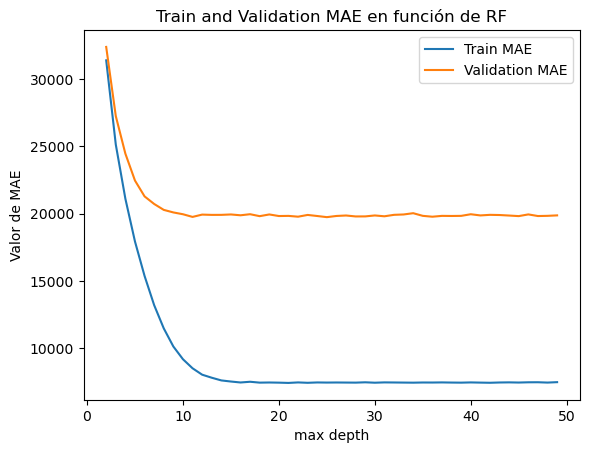

In [17]:
plt.plot(max_depth, list_dt_MAE_train, label='Train MAE')
plt.plot(max_depth, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('max depth')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de RF')
plt.legend()
plt.show()

In [18]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {max_depth[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: 25
Train MAE: 7455.9
Validation MAE: 19737.9


In [19]:
min_split = list(range(2,50))

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in min_split:
    rf = RandomForestRegressor(252, max_depth=25, min_samples_split= i, n_jobs= -1)
    cv_results = cross_validate(rf, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

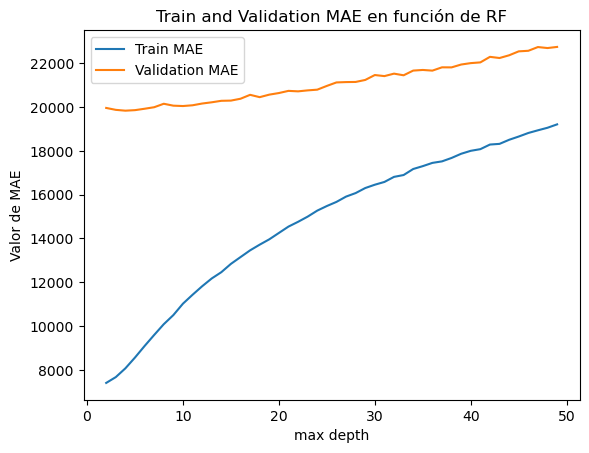

In [20]:
plt.plot(min_split, list_dt_MAE_train, label='Train MAE')
plt.plot(min_split, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('min split')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de RF')
plt.legend()
plt.show()

In [21]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {min_split[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: 4
Train MAE: 8072.7
Validation MAE: 19835.7


In [28]:
min_leafs_values = list(range(2,50))

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in min_leafs_values:
    rf = RandomForestRegressor(252, max_depth=25, min_samples_split= 4, min_samples_leaf= i, n_jobs= -1)
    cv_results = cross_validate(rf, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

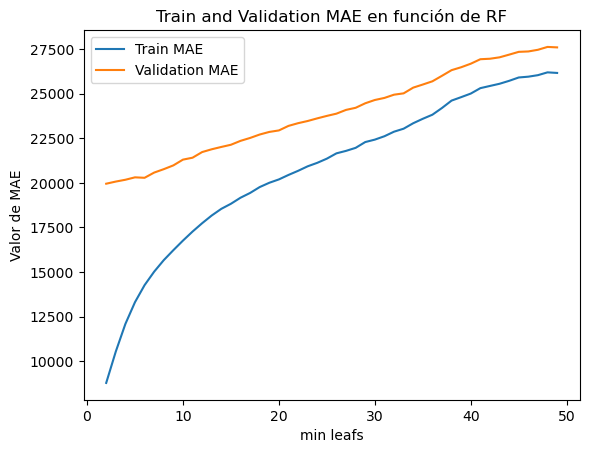

In [29]:
plt.plot(min_leafs_values, list_dt_MAE_train, label='Train MAE')
plt.plot(min_leafs_values, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('min leafs')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de RF')
plt.legend()
plt.show()

In [30]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {min_leafs_values[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: 2
Train MAE: 8783.1
Validation MAE: 19950.7


In [31]:
criterion_values = ["poisson", "friedman_mse", "squared_error", "absolute_error"]
list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in criterion_values:
    rf = RandomForestRegressor(252, max_depth=25, min_samples_split= 4, min_samples_leaf= 2, criterion=i, n_jobs= -1)
    cv_results = cross_validate(rf, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

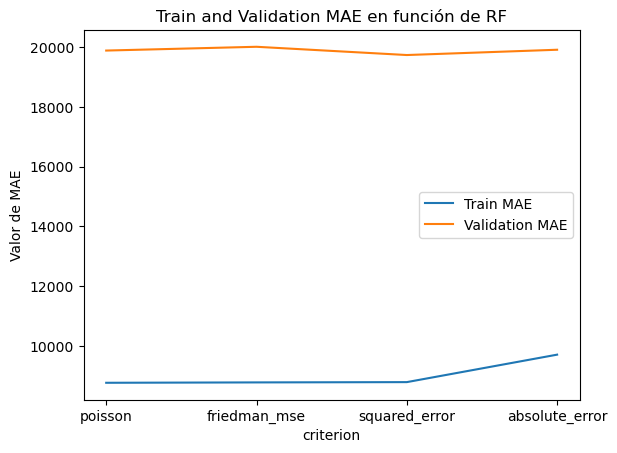

In [32]:
plt.plot(criterion_values, list_dt_MAE_train, label='Train MAE')
plt.plot(criterion_values, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('criterion')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de RF')
plt.legend()
plt.show()

In [36]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {criterion_values[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

print(f'Best num. split: {criterion_values[3]}')
print('Train MAE:', list_dt_MAE_train[3])
print('Validation MAE:', list_dt_MAE_vali[3])

Best num. split: squared_error
Train MAE: 8777.7
Validation MAE: 19739.2
Best num. split: absolute_error
Train MAE: 9698.2
Validation MAE: 19916.4


In [ ]:
#Por la diferencia me quedo con el absolute error que no se que es tan overfiting

In [37]:
max_features_options = ["sqrt", "log2", 0.2, 0.4, 0.6, 0.8]
list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in max_features_options:
    rf = RandomForestRegressor(252, max_depth=25, min_samples_split= 4, min_samples_leaf= 2, criterion="absolute_error", max_features= i, n_jobs= -1)
    cv_results = cross_validate(rf, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

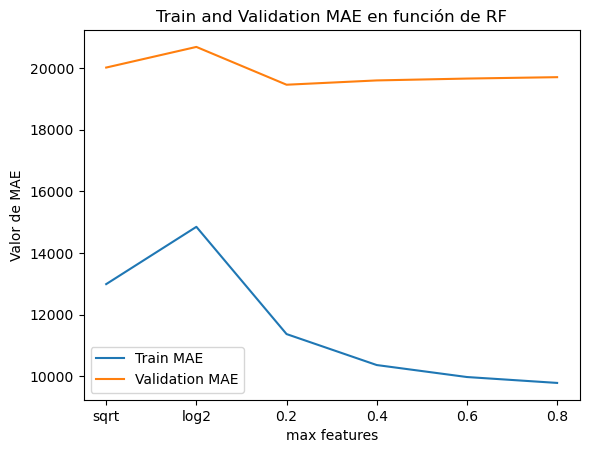

In [38]:
plt.plot(max_features_options, list_dt_MAE_train, label='Train MAE')
plt.plot(max_features_options, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('max features')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de RF')
plt.legend()
plt.show()

In [40]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {max_features_options[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: 0.2
Train MAE: 11371.8
Validation MAE: 19459.7


In [42]:
bootstrap = [True, False]

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in bootstrap:
    rf = RandomForestRegressor(252, max_depth=25, min_samples_split= 4, min_samples_leaf= 2, criterion="absolute_error", max_features= 0.2, bootstrap= i, n_jobs= -1)
    cv_results = cross_validate(rf, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))


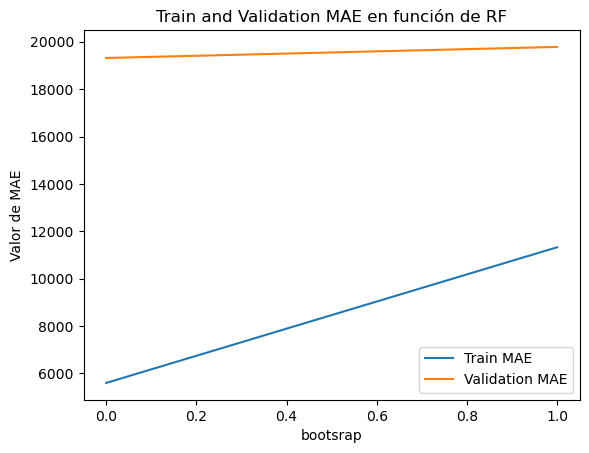

In [43]:
plt.plot(bootstrap, list_dt_MAE_train, label='Train MAE')
plt.plot(bootstrap, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('bootsrap')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de RF')
plt.legend()
plt.show()

In [46]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {bootstrap[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

print(f'Best num. split: {bootstrap[0]}')
print('Train MAE:', list_dt_MAE_train[0])
print('Validation MAE:', list_dt_MAE_vali[0])

Best num. split: False
Train MAE: 5597.8
Validation MAE: 19315.4
Best num. split: True
Train MAE: 11324.3
Validation MAE: 19782.0


In [ ]:
#Mejor cojer con bootstrap = true, porque en false esta overfitting

In [47]:
# Retrain the model on the whole training set
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
feature_importances

,Feature,Importance
6,GrLivArea,0.156747
1,YearBuilt,0.104935
3,TotalBsmtSF,0.091733
15,GarageArea,0.071349
4,1stFlrSF,0.070793
...,...,...
27,NoSeWa,0.000000
44,Shed,0.000000
64,Sbrkr,0.000000
51,Floor,0.000000


### Validacion de datos

In [85]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [86]:
rf = RandomForestRegressor(252, max_depth=25, min_samples_split= 4, min_samples_leaf= 2, criterion="absolute_error", max_features= 0.2, bootstrap= True, n_jobs= -1)
rf.fit(X_train2, y_train2)

RandomForestRegressor(criterion='absolute_error', max_depth=25,
                      max_features=0.2, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=252, n_jobs=-1)

In [87]:
y_pred = rf.predict(X_val)

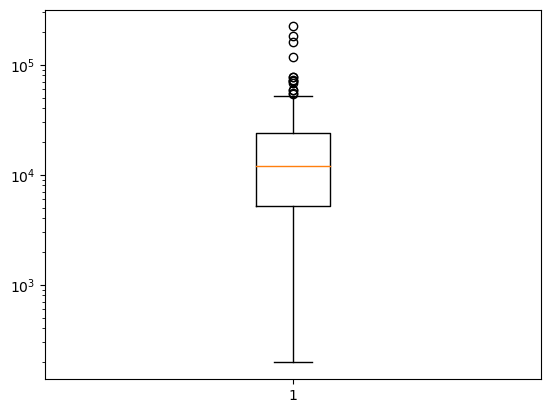

In [90]:
plt.boxplot(abs(y_val - y_pred))
plt.yscale('log')
plt.show()

In [94]:
print(abs(y_val - y_pred).median())
print(abs(y_val - y_pred).mean())

12045.615079365089
19307.169507190338


In [ ]:
#Hemos echo esta validacion para ver como van las predicciones sin tocar los tests, y en el podemos observar que el 
#50% de las validaciones estan por debajo de 12045,6 $ 

## Gradient Boosting Decision Tree

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
gbdt = GradientBoostingRegressor(max_depth=3, learning_rate=0.1)
cv_results = cross_validate(gbdt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 284464707.0
Validation MSE: 958546860.4

Train MAE: 12350.5
Validation MAE: 18785.4


In [44]:
learning_rates_values = [0.001 * i for i in range(1, 101)]

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in learning_rates_values:
    gbdt = GradientBoostingRegressor(max_depth=3, learning_rate=i)
    cv_results = cross_validate(gbdt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

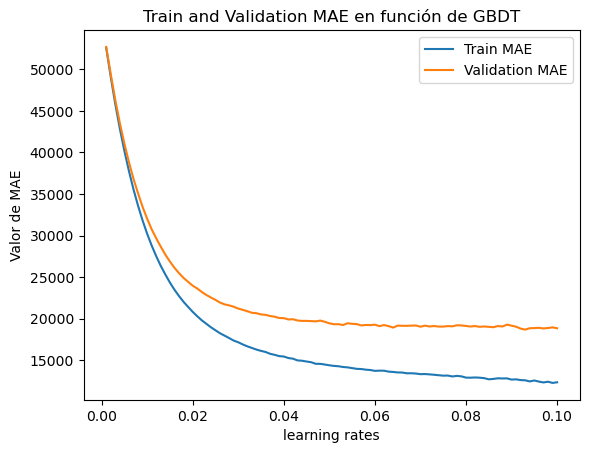

In [45]:
plt.plot(learning_rates_values, list_dt_MAE_train, label='Train MAE')
plt.plot(learning_rates_values, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('learning rates')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de GBDT')
plt.legend()
plt.show()

In [46]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {learning_rates_values[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: 0.093
Train MAE: 12589.2
Validation MAE: 18693.1


In [47]:
max_depth = list(range(2,30))

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in max_depth:
    gbdt = GradientBoostingRegressor(max_depth=i, learning_rate=0.093)
    cv_results = cross_validate(gbdt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))


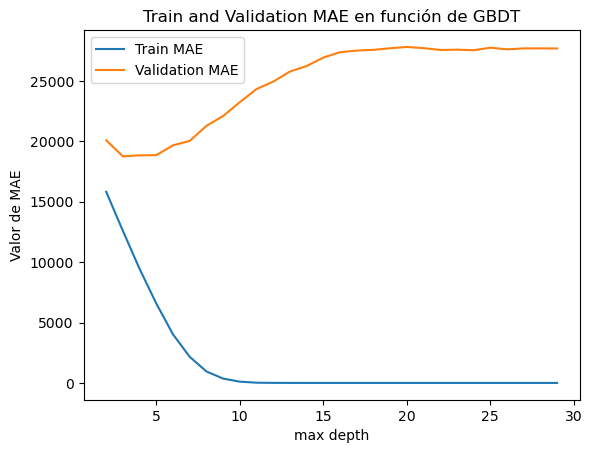

In [48]:
plt.plot(max_depth, list_dt_MAE_train, label='Train MAE')
plt.plot(max_depth, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('max depth')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de GBDT')
plt.legend()
plt.show()

In [49]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {max_depth[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: 3
Train MAE: 12589.2
Validation MAE: 18756.4


In [51]:
estimators = list(range(2, 502, 25))

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in estimators:
    gbdt = GradientBoostingRegressor(n_estimators= i, max_depth=3, learning_rate=0.093)
    cv_results = cross_validate(gbdt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

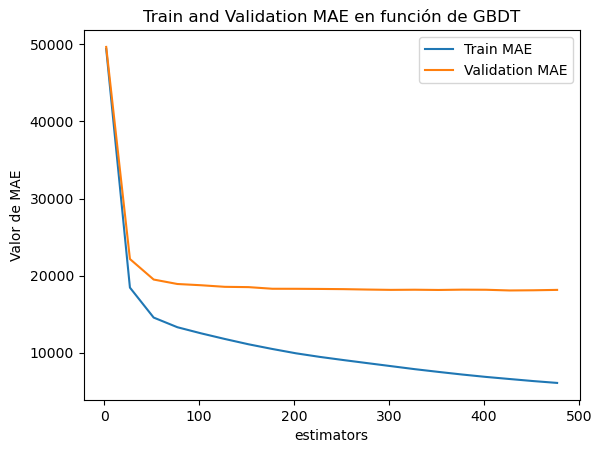

In [52]:
plt.plot(estimators, list_dt_MAE_train, label='Train MAE')
plt.plot(estimators, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('estimators')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de GBDT')
plt.legend()
plt.show()

In [53]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. estimators: {estimators[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

print(f'Best num. estimators: {estimators[7]}')
print('Train MAE:', list_dt_MAE_train[7])
print('Validation MAE:', list_dt_MAE_vali[7])

Best num. estimators: 427
Train MAE: 6588.7
Validation MAE: 18076.2
Best num. estimators: 177
Train MAE: 10485.0
Validation MAE: 18297.3


In [62]:
min_split_values = list(range(2,30))

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in min_split_values:
    gbdt = GradientBoostingRegressor(n_estimators= 177, max_depth=3, learning_rate=0.093, min_samples_split= i, random_state=42)
    cv_results = cross_validate(gbdt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

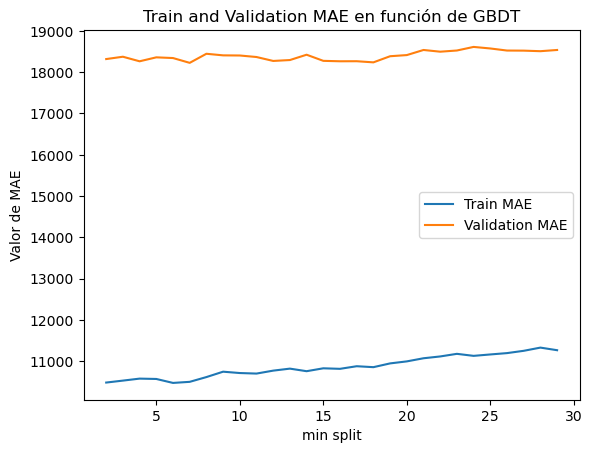

In [63]:
plt.plot(min_split_values, list_dt_MAE_train, label='Train MAE')
plt.plot(min_split_values, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('min split')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de GBDT')
plt.legend()
plt.show()

In [64]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {min_split_values[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: 7
Train MAE: 10502.5
Validation MAE: 18226.2


In [65]:
min_leafs_values = list(range(2,30))

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in min_leafs_values:
    gbdt = GradientBoostingRegressor(n_estimators= 177, max_depth=3, learning_rate=0.093, min_samples_split= 7, min_samples_leaf=i, random_state=42)
    cv_results = cross_validate(gbdt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

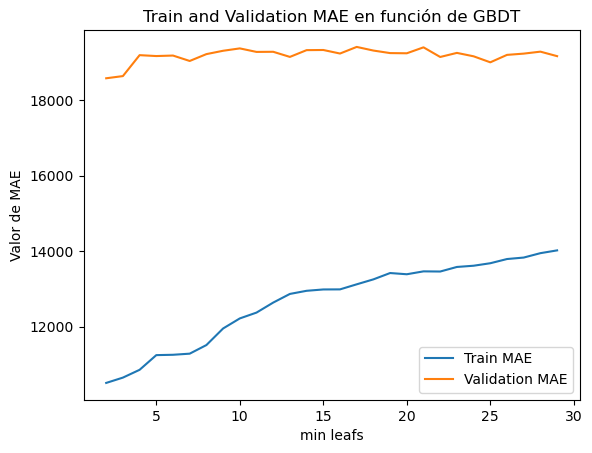

In [68]:
plt.plot(min_leafs_values, list_dt_MAE_train, label='Train MAE')
plt.plot(min_leafs_values, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('min leafs')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de GBDT')
plt.legend()
plt.show()

In [69]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. leafs: {min_leafs_values[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. leafs: 2
Train MAE: 10513.7
Validation MAE: 18579.7


In [89]:
criterion_values = ["friedman_mse", "squared_error"]

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in criterion_values:
    gbdt = GradientBoostingRegressor(n_estimators= 177, max_depth=3, learning_rate=0.093, min_samples_split= 7, criterion=i)
    cv_results = cross_validate(gbdt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

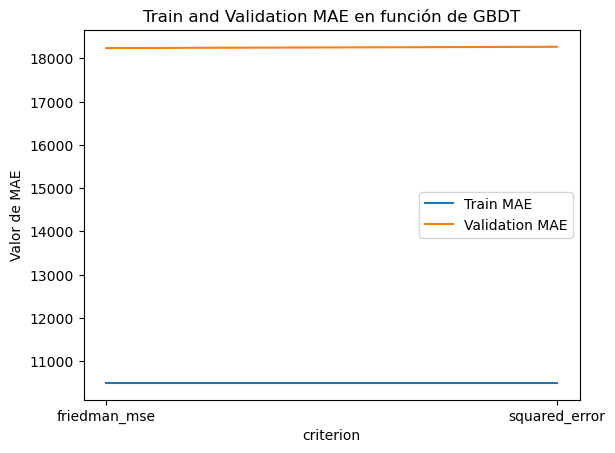

In [90]:
plt.plot(criterion_values, list_dt_MAE_train, label='Train MAE')
plt.plot(criterion_values, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('criterion')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de GBDT')
plt.legend()
plt.show()

In [91]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {criterion_values[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

print(f'Best num. split: {criterion_values[0]}')
print('Train MAE:', list_dt_MAE_train[0])
print('Validation MAE:', list_dt_MAE_vali[0])

Best num. split: friedman_mse
Train MAE: 10502.5
Validation MAE: 18239.0
Best num. split: friedman_mse
Train MAE: 10502.5
Validation MAE: 18239.0


In [76]:
max_features_options = ["sqrt", "log2", 0.2, 0.4, 0.6, 0.8]

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in max_features_options:
    gbdt = GradientBoostingRegressor(n_estimators= 177, max_depth=3, learning_rate=0.093, min_samples_split= 7, max_features=i)
    cv_results = cross_validate(gbdt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))

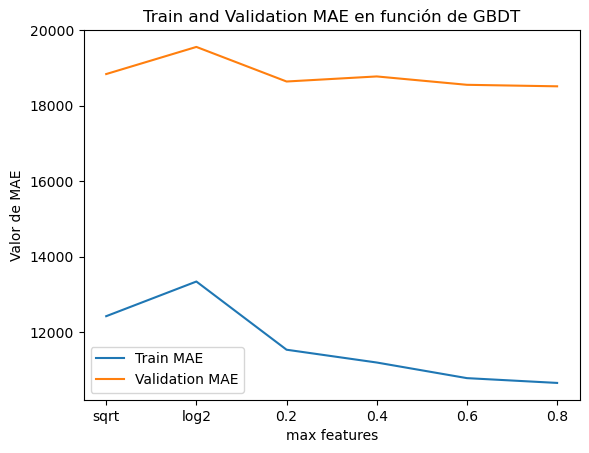

In [77]:
plt.plot(max_features_options, list_dt_MAE_train, label='Train MAE')
plt.plot(max_features_options, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('max features')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de GBDT')
plt.legend()
plt.show()

In [78]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {max_features_options[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: 0.8
Train MAE: 10655.2
Validation MAE: 18514.3


In [79]:
# n_iter_no_change este hyperparametro sirbe para que si ve que no mejora te para a las n iteraciones que no cambia demasiado

n_iter_values = list(range(2,100))

list_dt_MAE_train = []
list_dt_MAE_vali = []

for i in n_iter_values:
    gbdt = GradientBoostingRegressor(n_estimators= 177, max_depth=3, learning_rate=0.093, min_samples_split= 7, n_iter_no_change = i)
    cv_results = cross_validate(gbdt, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_dt_MAE_train.append(cv_results['train_MAE'].mean().round(1))
    list_dt_MAE_vali.append(cv_results['test_MAE'].mean().round(1))


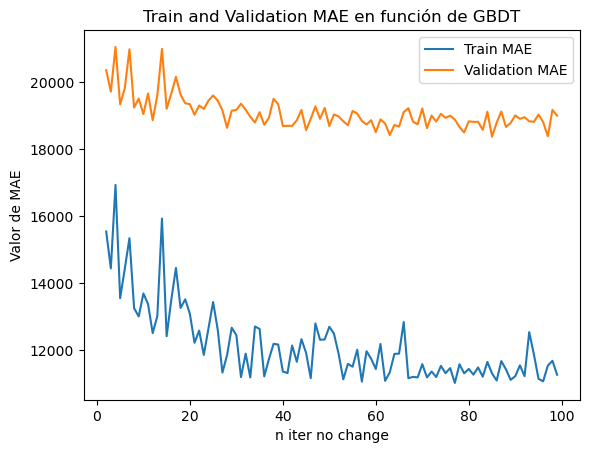

In [80]:
plt.plot(n_iter_values, list_dt_MAE_train, label='Train MAE')
plt.plot(n_iter_values, list_dt_MAE_vali, label='Validation MAE')
plt.xlabel('n iter no change')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de GBDT')
plt.legend()
plt.show()

In [81]:
idx_best = np.argmin(list_dt_MAE_vali)

print(f'Best num. split: {n_iter_values[idx_best]}')
print('Train MAE:', list_dt_MAE_train[idx_best])
print('Validation MAE:', list_dt_MAE_vali[idx_best])

Best num. split: 85
Train MAE: 11294.5
Validation MAE: 18375.2


## Hyperparameter Tuning

In [14]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Randomized Search

#### KNN

In [174]:
from sklearn.preprocessing import RobustScaler

param_dist = {
    "knn__n_neighbors": [3, 5, 10, 20],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2]
}

knn2 = Pipeline([
    ('scale', RobustScaler()),
    ('knn', KNeighborsRegressor(n_jobs=-1))
])


dt_rscv = RandomizedSearchCV(knn2, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf2,
                             refit=lambda x: x["mean_test_MAE"].argmin(), n_jobs=-1)

dt_rscv.fit(X_train, y_train)
print("Best RandomizedSearchCV parameters: ", dt_rscv.best_params_)

Best RandomizedSearchCV parameters:  {'knn__weights': 'distance', 'knn__p': 1, 'knn__n_neighbors': 5}


#### Decision Tree

In [176]:
param_dist = {
    "max_depth": [3, 5, 10, 20, 50, 100, None],
    "min_samples_split": np.arange(2, 11),
    "min_samples_leaf": np.arange(1, 11),    
    "criterion": ["poisson", "friedman_mse", "squared_error", "absolute_error"]
}
dt = DecisionTreeRegressor()
dt_rscv = RandomizedSearchCV(dt, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             n_iter=50, cv=kf, verbose=1,
                             refit=lambda x: x["mean_test_MAE"].argmin(), n_jobs=-1)

dt_rscv.fit(X_train, y_train)
print("Best RandomizedSearchCV parameters: ", dt_rscv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'min_samples_split': 18, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'absolute_error'}


In [177]:
print('Train MSE:', dt_rscv.cv_results_['mean_train_MSE'][dt_rscv.best_index_].round(1))
print('Validation MSE:', dt_rscv.cv_results_['mean_test_MSE'][dt_rscv.best_index_].round(1))
print()
print('Train MAE:', dt_rscv.cv_results_['mean_train_MAE'][dt_rscv.best_index_].round(1))
print('Validation MAE:', dt_rscv.cv_results_['mean_test_MAE'][dt_rscv.best_index_].round(1))

Train MSE: 870244536.2
Validation MSE: 1581440736.3

Train MAE: 16167.1
Validation MAE: 25160.9


#### Random Forest

In [185]:
param_dist = {
    "max_depth": [3, 5, 10, 20, 50, 100, None],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["poisson", "friedman_mse", "squared_error", "absolute_error"],
    "n_estimators": np.arange(2,200),
    "max_features": ["sqrt", "log2", 0.2, 0.4, 0.6, 0.8],  
    "bootstrap": [True, False]
}
dt = RandomForestRegressor()
dt_rscv = RandomizedSearchCV(dt, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit=lambda x: x["mean_test_MAE"].argmin(), n_jobs=-1)

dt_rscv.fit(X_train, y_train)
print("Best RandomizedSearchCV parameters: ", dt_rscv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 198, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 0.2, 'max_depth': 100, 'criterion': 'friedman_mse', 'bootstrap': False}


In [186]:
print('Train MSE:', dt_rscv.cv_results_['mean_train_MSE'][dt_rscv.best_index_].round(1))
print('Validation MSE:', dt_rscv.cv_results_['mean_test_MSE'][dt_rscv.best_index_].round(1))
print()
print('Train MAE:', dt_rscv.cv_results_['mean_train_MAE'][dt_rscv.best_index_].round(1))
print('Validation MAE:', dt_rscv.cv_results_['mean_test_MAE'][dt_rscv.best_index_].round(1))

Train MSE: 435132181.7
Validation MSE: 1062163374.4

Train MAE: 12542.0
Validation MAE: 19822.1


#### Gradient Boosting Decision Tree

In [82]:
param_dist = {
    "max_depth": [3, 5, 10, 20, 50, 100, None],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["friedman_mse", "squared_error"],
    "n_estimators": np.arange(2,200),
    "max_features": ["sqrt", "log2", 0.2, 0.4, 0.6, 0.8], 
    "learning_rate": [ 0.09, 0.091, 0.092, 0.093, 0.094]
}
dt = GradientBoostingRegressor()
dt_rscv = RandomizedSearchCV(dt, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit=lambda x: x["mean_test_MAE"].argmin(), n_jobs=-1)

dt_rscv.fit(X_train, y_train)
print("Best RandomizedSearchCV parameters: ", dt_rscv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 124, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.094, 'criterion': 'friedman_mse'}


In [83]:
print('Train MSE:', dt_rscv.cv_results_['mean_train_MSE'][dt_rscv.best_index_].round(1))
print('Validation MSE:', dt_rscv.cv_results_['mean_test_MSE'][dt_rscv.best_index_].round(1))
print()
print('Train MAE:', dt_rscv.cv_results_['mean_train_MAE'][dt_rscv.best_index_].round(1))
print('Validation MAE:', dt_rscv.cv_results_['mean_test_MAE'][dt_rscv.best_index_].round(1))

Train MSE: 157723729.8
Validation MSE: 973030713.3

Train MAE: 9072.1
Validation MAE: 18733.1


### Grid Search

#### KNN

In [16]:
from sklearn.preprocessing import RobustScaler

param_dist = {
    "knn__n_neighbors": [3, 4, 5, 6, 7, 8],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2]
}

knn2 = Pipeline([
    ('scale', RobustScaler()),
    ('knn', KNeighborsRegressor(n_jobs=-1))
])

dt_gscv = GridSearchCV(knn2, param_grid=param_dist,
                       scoring=scoring, return_train_score=True,
                       refit=lambda x: x["mean_test_MAE"].argmin(),
                       cv=kf2, verbose=1, n_jobs=-1)

dt_gscv.fit(X_train, y_train)
print("Best GridSearchCV parameters: ", dt_gscv.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best GridSearchCV parameters:  {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}


In [ ]:
print('Train MSE:', dt_rscv.cv_results_['mean_train_MSE'][dt_rscv.best_index_].round(1))
print('Validation MSE:', dt_rscv.cv_results_['mean_test_MSE'][dt_rscv.best_index_].round(1))
print()
print('Train MAE:', dt_rscv.cv_results_['mean_train_MAE'][dt_rscv.best_index_].round(1))
print('Validation MAE:', dt_rscv.cv_results_['mean_test_MAE'][dt_rscv.best_index_].round(1))

#### Decision Tree

In [17]:
param_dist = {
    "max_depth": [4, 5, 6, 7, 8, 9, 10, 11],
    "min_samples_split": [15,18,19,20,21,23],
    "min_samples_leaf": [5,6,7,8,9],    
    "criterion": ["poisson", "absolute_error"]
}
dt = DecisionTreeRegressor()
dt_gscv = GridSearchCV(dt, param_grid=param_dist,
                       scoring=scoring, return_train_score=True,
                       refit=lambda x: x["mean_test_MAE"].argmin(),
                       cv=kf, verbose=1, n_jobs=-1)

dt_gscv.fit(X_train, y_train)
print("Best GridSearchCV parameters: ", dt_gscv.best_params_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best GridSearchCV parameters:  {'criterion': 'absolute_error', 'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 23}


In [ ]:
print('Train MSE:', dt_rscv.cv_results_['mean_train_MSE'][dt_rscv.best_index_].round(1))
print('Validation MSE:', dt_rscv.cv_results_['mean_test_MSE'][dt_rscv.best_index_].round(1))
print()
print('Train MAE:', dt_rscv.cv_results_['mean_train_MAE'][dt_rscv.best_index_].round(1))
print('Validation MAE:', dt_rscv.cv_results_['mean_test_MAE'][dt_rscv.best_index_].round(1))

#### Random Forest

In [19]:
param_dist = {
    "max_depth": [24,25,26],
    "min_samples_split": [3,4,5],
    "min_samples_leaf": [2,3,4],
    "criterion": ["absolute_error"],
    "n_estimators": [250,255,260],
    "max_features": [0.19,0.20,0.21],  
    "bootstrap": [True]
}
rf =  RandomForestRegressor()
rf_gscv = GridSearchCV(rf, param_grid=param_dist,
                       scoring=scoring, return_train_score=True,
                       refit=lambda x: x["mean_test_MAE"].argmin(),
                       cv=kf, verbose=1, n_jobs=-1)

rf_gscv.fit(X_train, y_train)
print("Best GridSearchCV parameters: ", rf_gscv.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best GridSearchCV parameters:  {'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 24, 'max_features': 0.21, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 250}


In [22]:
print('Train MSE:', rf_gscv.cv_results_['mean_train_MSE'][rf_gscv.best_index_].round(1))
print('Validation MSE:', rf_gscv.cv_results_['mean_test_MSE'][rf_gscv.best_index_].round(1))
print()
print('Train MAE:', rf_gscv.cv_results_['mean_train_MAE'][rf_gscv.best_index_].round(1))
print('Validation MAE:', rf_gscv.cv_results_['mean_test_MAE'][rf_gscv.best_index_].round(1))

Train MSE: 394047269.6
Validation MSE: 1045362722.5

Train MAE: 11191.4
Validation MAE: 19477.4


In [29]:
param_dist = {
    "max_depth": [24,25,26],
    "min_samples_split": [3,4,5],  
    "n_estimators": [250,255,260], 
}
rf =  RandomForestRegressor()
rf_gscv2 = GridSearchCV(rf, param_grid=param_dist,
                       scoring=scoring, return_train_score=True,
                       refit=lambda x: x["mean_test_MAE"].argmin(),
                       cv=kf, verbose=1, n_jobs=-1)

rf_gscv2.fit(X_train, y_train)
print("Best GridSearchCV parameters: ", rf_gscv2.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best GridSearchCV parameters:  {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 260}


In [30]:
print('Train MSE:', rf_gscv2.cv_results_['mean_train_MSE'][rf_gscv2.best_index_].round(1))
print('Validation MSE:', rf_gscv2.cv_results_['mean_test_MSE'][rf_gscv2.best_index_].round(1))
print()
print('Train MAE:', rf_gscv2.cv_results_['mean_train_MAE'][rf_gscv2.best_index_].round(1))
print('Validation MAE:', rf_gscv2.cv_results_['mean_test_MAE'][rf_gscv2.best_index_].round(1))

Train MSE: 210624329.3
Validation MSE: 1062890007.1

Train MAE: 8545.8
Validation MAE: 19748.2


#### Gradient Boosting Decision Tree

In [99]:
param_dist = {
    "max_depth": [2, 3, 4],
    "min_samples_split": [6,7,8],
    "min_samples_leaf": [2,3,4],
    "criterion": ["friedman_mse", "squared_error"],
    "n_estimators": [165, 170, 175, 177, 180 , 185],
    "max_features": [0.8], 
    "learning_rate": [ 0.091, 0.092, 0.093]
}
dt = GradientBoostingRegressor()
dt_gscv = GridSearchCV(dt, param_grid=param_dist,
                       scoring=scoring, return_train_score=True,
                       refit=lambda x: x["mean_test_MAE"].argmin(),
                       cv=kf2, verbose=1, n_jobs=-1)

dt_gscv.fit(X_train, y_train)
print("Best GridSearchCV parameters: ", dt_gscv.best_params_)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits
Best GridSearchCV parameters:  {'criterion': 'squared_error', 'learning_rate': 0.092, 'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 180}


In [100]:
print('Train MSE:', dt_rscv.cv_results_['mean_train_MSE'][dt_rscv.best_index_].round(1))
print('Validation MSE:', dt_rscv.cv_results_['mean_test_MSE'][dt_rscv.best_index_].round(1))
print()
print('Train MAE:', dt_rscv.cv_results_['mean_train_MAE'][dt_rscv.best_index_].round(1))
print('Validation MAE:', dt_rscv.cv_results_['mean_test_MAE'][dt_rscv.best_index_].round(1))

Train MSE: 157723729.8
Validation MSE: 973030713.3

Train MAE: 9072.1
Validation MAE: 18733.1


In [23]:
param_dist = {
    "max_depth": [2, 3, 4],
    "min_samples_split": [6,7,8],  
    "n_estimators": [165, 170, 175, 177, 180 , 185],  
}
gb = GradientBoostingRegressor()
gb_gscv = GridSearchCV(gb, param_grid=param_dist,
                       scoring=scoring, return_train_score=True,
                       refit=lambda x: x["mean_test_MAE"].argmin(),
                       cv=kf2, verbose=1, n_jobs=-1)

gb_gscv.fit(X_train, y_train)
print("Best GridSearchCV parameters: ", gb_gscv.best_params_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best GridSearchCV parameters:  {'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 175}


In [24]:
print('Train MSE:', gb_gscv.cv_results_['mean_train_MSE'][gb_gscv.best_index_].round(1))
print('Validation MSE:', gb_gscv.cv_results_['mean_test_MSE'][gb_gscv.best_index_].round(1))
print()
print('Train MAE:', gb_gscv.cv_results_['mean_train_MAE'][gb_gscv.best_index_].round(1))
print('Validation MAE:', gb_gscv.cv_results_['mean_test_MAE'][gb_gscv.best_index_].round(1))

Train MSE: 212814392.2
Validation MSE: 912337453.1

Train MAE: 10763.2
Validation MAE: 18394.2


## Test

RF
Train MAE: 11044.857520547945
Test MAE: 19517.976219178083
Test MedAE: 10729.26000000001

GBDT
Train MAE: 10986.257222856962
Test MAE: 18031.328700425664
Test MedAE: 11308.179411891178



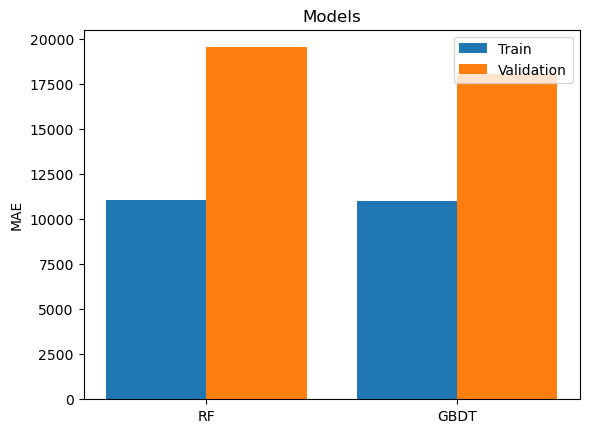

In [26]:
models = [
    ('RF', rf_gscv),
    ('GBDT', gb_gscv),
]

y_train_axis = []
y_valid_axis = []

for name, model in models:
    model.best_estimator_.fit(X_train, y_train)
    y_train_pred = model.best_estimator_.predict(X_train)
    y_test_pred = model.best_estimator_.predict(X_test)
    y_train_axis.append(mean_absolute_error(y_train, y_train_pred))
    y_valid_axis.append(mean_absolute_error(y_test, y_test_pred))
    print(name)
    print('Train MAE:', mean_absolute_error(y_train, y_train_pred))
    print('Test MAE:', mean_absolute_error(y_test, y_test_pred))
    print('Test MedAE:', median_absolute_error(y_test, y_test_pred))
    print()

x_axis = np.arange(len(models))
plt.bar(x_axis - 0.2, y_train_axis, 0.4, label = 'Train')
plt.bar(x_axis + 0.2, y_valid_axis, 0.4, label = 'Validation')
  
plt.xticks(x_axis, [name for name, _ in models])
plt.ylabel('MAE')
plt.title('Models')
plt.legend()
plt.show()

## Save Model

In [27]:
import pickle

In [28]:
with open('model_gbdt.pkl', 'wb') as f:
    pickle.dump(gb_gscv.best_estimator_, f)

## Observaciones Finales

In [ ]:
'''
Habiendo ya obserbado todos los casos en que hemos hecho pruebas, podemos asegurar que nuestra mejores opciones que mejor nos va es la de random 
forest y el gradien boosting decision tree. 
El random forest en k = 5
El gradien boostin decision tree k = 10
k = 10 es que valida 10 veces en el cross validation.
El random forest me ira mejor para valorar casas con precios bajos, y el gradien boosting me medira mejor los precios mas altos.
'''

## Neuronal Network

### Train / Test

In [9]:
X2 = df.drop('SalePrice', axis=1)
y2 = df['SalePrice']

# Train / Test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train / Validation split
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import RobustScaler

# Scale the data

scaler = RobustScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_val = scaler.transform(X2_val)
X2_test = scaler.transform(X2_test)

### Model

#### Linear Neuron

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [17]:
# Define the NN model

model = Sequential([
    Input(X2_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear'),
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mae', 'mse'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1360      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1505 (5.88 KB)
Trainable params: 1505 (5.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
results = model.fit(X2_train, y2_train, epochs=75, batch_size=16, validation_data=(X2_val, y2_val))


Epoch 1/75
59/59 [==============================] - 0s 2ms/step - loss: 1557414016.0000 - mae: 25444.4395 - mse: 1557414016.0000 - val_loss: 1220429440.0000 - val_mae: 24322.3594 - val_mse: 1220429440.0000
Epoch 2/75
59/59 [==============================] - 0s 1ms/step - loss: 1547883776.0000 - mae: 25525.9648 - mse: 1547883776.0000 - val_loss: 1226253568.0000 - val_mae: 24175.5840 - val_mse: 1226253568.0000
Epoch 3/75
59/59 [==============================] - 0s 1ms/step - loss: 1543395456.0000 - mae: 25161.2246 - mse: 1543395456.0000 - val_loss: 1209430656.0000 - val_mae: 24022.2461 - val_mse: 1209430656.0000
Epoch 4/75
59/59 [==============================] - 0s 1ms/step - loss: 1530860672.0000 - mae: 25007.0801 - mse: 1530860672.0000 - val_loss: 1216504576.0000 - val_mae: 23973.6836 - val_mse: 1216504576.0000
Epoch 5/75
59/59 [==============================] - 0s 1ms/step - loss: 1489629056.0000 - mae: 24822.1602 - mse: 1489629056.0000 - val_loss: 1210504448.0000 - val_mae: 23859.89

In [20]:
# The `results` object contains the loss and metrics values for the training data

results.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [30]:
results.history['val_mae'][-5:]

[22525.54296875,
 22502.287109375,
 22515.013671875,
 22500.8828125,
 22552.75390625]

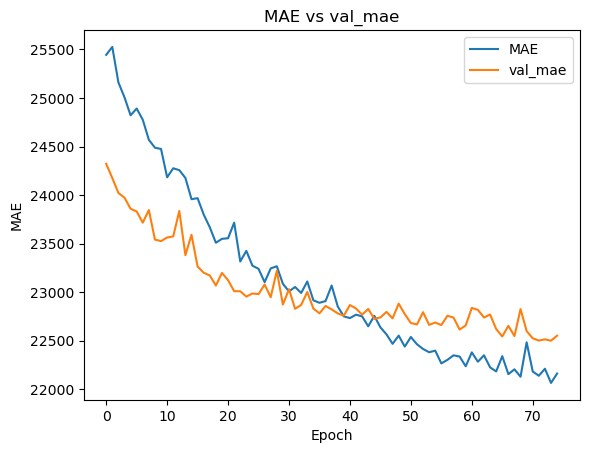

In [31]:
plt.plot(results.history['mae'])
plt.plot(results.history['val_mae'])
plt.title('MAE vs val_mae')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['MAE', 'val_mae'], loc='upper right')
plt.show()

In [32]:
# Evaluates on the given metrics (when we compiled the model) and the loss function

train_loss, train_mae, train_mse = model.evaluate(X2_train, y2_train)
val_loss, val_mae, val_mse = model.evaluate(X2_val, y2_val)

8/8 [==============================] - 0s 1ms/step - loss: 1098971776.0000 - mae: 22552.7559 - mse: 1098971776.0000


In [33]:
print(f'Train MAE: {train_mae:.2f}')
print(f'Validation MAE: {val_mae:.2f}')
print()
print(f'Train MSE: {train_mse:.2f}')
print(f'Validation MSE: {val_mse:.2f}')

Train MAE: 21896.75
Validation MAE: 22552.76

Train MSE: 1206101504.00
Validation MSE: 1098971776.00
